In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data

In [633]:
arr=pd.read_csv('../music/experiment/ArraytrackResults.txt', delimiter='\t')
arr['perSpec'] = 1
arr['smoothing'] = arr['subArrNum'] > 1
arr['backw'] = arr['backwSmth'] == 1
arr['bandwidth'] = 20
arr['decimation'] = False

cols = arr.columns.tolist()
cols = [cols[2]] + cols[3:6] + [cols[0]] + cols[-6:-3] + [cols[-3]] + cols[-2:] + cols[6:11]
arr = arr[cols]
arr['errorNextAngle'] = abs(arr.nextAngle - arr.realAngle)

In [727]:
ori=pd.read_csv('experiment/OrionResults.txt', delimiter='\t')
ori['smoothing'] = ori['smoothing'] == 1
ori['backw'] = ori['backw'] == 1
ori['decimation'] = ori['decimation'] == 1
ori = ori.rename(columns={'packetPerSpec':'perSpec'})
ori.drop(columns=['SNR', 'realAngle', 'Kfactor'], inplace=True)
ori = ori.merge(arr[['seed', 'SNR', 'realAngle', 'Kfactor']].drop_duplicates().reset_index(drop=True))
ori['errorAngle'] = abs(ori.estAngle - ori.realAngle)
ori['errorNextAngle'] = abs(ori.nextAngle - ori.realAngle)

cols = ori.columns.tolist()
cols = [cols[1]] + [cols[-4]] + [cols[-2]] + [cols[-3]] + [cols[0]] + cols[7:9] + cols[-6:-4] + cols[-8:-6] + cols[2:7] + [cols[-1]]
ori = ori[cols]

In [793]:
ori_old=pd.read_csv('../music/experiment/OrionResults.txt', delimiter='\t')
ori_old['smoothing'] = False
ori_old['backw'] = False
ori_old['decimation'] = ori_old['decimation'] == 1
ori_old = ori_old.rename(columns={'packetPerSpec':'perSpec'})
ori_old['errorNextAngle'] = abs(ori_old.nextAngle - ori_old.realAngle)

cols = ori_old.columns.tolist()
cols = cols[1:5] + [cols[0]] + cols[-7:-5] + cols[-3:-1] + cols[-5:-3] + cols[5:10] + [cols[-1]]
ori_old = ori_old[cols]

In [5]:
spotfi=pd.read_csv('SpotfiClusters/SpotfiResults.txt', delimiter='\t')
spotfi=spotfi.merge(arr[['seed', 'SNR', 'realAngle', 'Kfactor']].drop_duplicates().reset_index(drop=True))
spotfi['errorAngle'] = abs(spotfi.meanA1 - spotfi.realAngle)
spotfi['errorNextAngle'] = abs(spotfi.realAngle - spotfi.meanA2)
spotfi['errorNextNextAngle'] = abs(spotfi.realAngle - spotfi.meanA3)
spotfi = spotfi.rename(columns={'packetPerSpec':'perSpec'})
spotfi.smoothing = spotfi.smoothing == 1
spotfi.backw = spotfi.backw == 1
spotfi.decimation = spotfi.decimation == 1
spotfi['estAngle'] = spotfi.meanA1
spotfi['nextAngle'] = spotfi.meanA2
spotfi['nextNextAngle'] = spotfi.meanA3

cols = spotfi.columns.tolist()
cols = [cols[1]] + [cols[-9], cols[-7], cols[-8]] + [cols[0]] + cols[4:6] + cols[2:4] + cols[6:8] + cols[-3:] + cols[-6:-3] + cols[8:-9]
spotfi = spotfi[cols]

spotfi['spectrumsNum'] = (spotfi.packetNum / spotfi.perSpec)

In [6]:
spotfi_fixed=pd.read_csv('SpotfiClusters/SpotfiResults_fixed_eigen.txt', delimiter='\t')
spotfi_fixed=spotfi_fixed.merge(arr[['seed', 'SNR', 'realAngle', 'Kfactor']].drop_duplicates().reset_index(drop=True))
spotfi_fixed['errorAngle'] = abs(spotfi_fixed.meanA1 - spotfi_fixed.realAngle)
spotfi_fixed['errorNextAngle'] = abs(spotfi_fixed.realAngle - spotfi_fixed.meanA2)
spotfi_fixed['errorNextNextAngle'] = abs(spotfi_fixed.realAngle - spotfi_fixed.meanA3)
spotfi_fixed = spotfi_fixed.rename(columns={'packetPerSpec':'perSpec'})
spotfi_fixed.smoothing = spotfi_fixed.smoothing == 1
spotfi_fixed.backw = spotfi_fixed.backw == 1
spotfi_fixed.decimation = spotfi_fixed.decimation == 1
spotfi_fixed['estAngle'] = spotfi_fixed.meanA1
spotfi_fixed['nextAngle'] = spotfi_fixed.meanA2
spotfi_fixed['nextNextAngle'] = spotfi_fixed.meanA3

cols = spotfi_fixed.columns.tolist()
cols = [cols[1]] + [cols[-9], cols[-7], cols[-8]] + [cols[0]] + cols[4:6] + cols[2:4] + cols[6:8] + cols[-3:] + cols[-6:-3] + cols[8:-9]
spotfi_fixed = spotfi_fixed[cols]

spotfi_fixed['spectrumsNum'] = (spotfi_fixed.packetNum / spotfi_fixed.perSpec)
spotfi_fixed['minErrorAngle'] = spotfi_fixed[['errorAngle','errorNextAngle','errorNextNextAngle']].min(axis=1)

In [579]:
spotfi_fixed_1=pd.read_csv('SpotfiClusters/SpotfiResults_fixed_eigen_1.txt', delimiter='\t')
spotfi_fixed_1=spotfi_fixed_1.merge(arr[['seed', 'SNR', 'realAngle', 'Kfactor']].drop_duplicates().reset_index(drop=True))
spotfi_fixed_1['errorAngle'] = abs(spotfi_fixed_1.meanA1 - spotfi_fixed_1.realAngle)
spotfi_fixed_1['errorNextAngle'] = abs(spotfi_fixed_1.realAngle - spotfi_fixed_1.meanA2)
spotfi_fixed_1['errorNextNextAngle'] = abs(spotfi_fixed_1.realAngle - spotfi_fixed_1.meanA3)
spotfi_fixed_1 = spotfi_fixed_1.rename(columns={'packetPerSpec':'perSpec'})
spotfi_fixed_1.smoothing = spotfi_fixed_1.smoothing == 1
spotfi_fixed_1.backw = spotfi_fixed_1.backw == 1
spotfi_fixed_1.decimation = spotfi_fixed_1.decimation == 1
spotfi_fixed_1['estAngle'] = spotfi_fixed_1.meanA1
spotfi_fixed_1['nextAngle'] = spotfi_fixed_1.meanA2
spotfi_fixed_1['nextNextAngle'] = spotfi_fixed_1.meanA3

cols = spotfi_fixed_1.columns.tolist()
cols = [cols[1]] + [cols[-9], cols[-7], cols[-8]] + [cols[0]] + cols[4:6] + cols[2:4] + cols[6:8] + cols[-3:] + cols[-6:-3] + cols[8:-9]
spotfi_fixed_1 = spotfi_fixed_1[cols]

spotfi_fixed_1['spectrumsNum'] = (spotfi_fixed_1.packetNum / spotfi_fixed_1.perSpec)
spotfi_fixed_1['minErrorAngle'] = spotfi_fixed_1[['errorAngle','errorNextAngle','errorNextNextAngle']].min(axis=1)

# Look at data

In [660]:
arr.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,errorNextAngle
0,1,8.3404,16.5439,39.6584,8,30,1,True,True,20,False,39.6833,0.059209,0.024925,999.0,999.0,959.3416
1,1,8.3404,16.5439,39.6584,8,10,1,True,True,20,False,39.6900,0.073786,0.031591,999.0,999.0,959.3416
2,1,8.3404,16.5439,39.6584,8,30,1,True,False,20,False,39.6833,0.059209,0.024925,999.0,999.0,959.3416
3,1,8.3404,16.5439,39.6584,8,10,1,True,False,20,False,39.6900,0.073786,0.031591,999.0,999.0,959.3416
4,1,8.3404,16.5439,39.6584,8,30,1,False,True,20,False,39.7367,0.049013,0.078258,999.0,999.0,959.3416


In [683]:
ori.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,errorNextAngle
0,1,8.3404,16.5439,39.6584,8,30,2,True,True,40,False,39.7000,1.471000e-14,0.0416,-10.8333,2.1033,50.4917
1,1,8.3404,16.5439,39.6584,8,10,2,True,True,40,False,39.7000,0.000000e+00,0.0416,-51.5800,1.7570,91.2384
2,1,8.3404,16.5439,39.6584,8,30,1,True,True,40,False,39.7067,3.651500e-02,0.0483,-6.7600,2.6769,46.4184
3,1,8.3404,16.5439,39.6584,8,10,1,True,True,40,False,39.7000,7.489800e-15,0.0416,-18.4500,2.4250,58.1084
4,1,8.3404,16.5439,39.6584,8,30,2,True,True,40,True,39.7000,1.471000e-14,0.0416,-17.5533,2.7412,57.2117


In [684]:
ori_old.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,decimation,estAngle,stdAngle,errorAngle,nextAngle,stdNextAngle,perSpec,bandwidth,errorNextAngle
0,1,8.3404,16.5439,39.6584,8,10,2,False,False,40,False,39.6733,0.070373,0.014925,-54.1333,2.8215,2,40,93.7917
1,1,8.3404,16.5439,39.6584,8,10,2,False,False,40,False,39.7200,0.044721,0.061591,-55.6200,1.8116,2,40,95.2784
2,1,8.3404,16.5439,39.6584,8,10,1,False,False,40,False,39.8167,0.101990,0.158260,-15.1333,3.6398,1,40,54.7917
3,1,8.3404,16.5439,39.6584,8,10,1,False,False,40,False,39.8100,0.128670,0.151590,-0.9100,3.3044,1,40,40.5684
4,1,8.3404,16.5439,39.6584,8,10,2,False,False,40,True,39.8733,0.070373,0.214920,-51.6000,2.9367,2,40,91.2584


In [621]:
spotfi.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,...,stdA4,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,spectrumsNum
0,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0
1,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0
2,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0
3,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0
4,1,8.3404,16.5439,39.6584,8,10,1,False,False,20,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0


In [624]:
spotfi_fixed.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,...,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,spectrumsNum,minErrorAngle
0,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0,0.3416
1,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0,0.3416
2,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0,0.3416
3,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0,0.3416
4,1,8.3404,16.5439,39.6584,8,10,1,False,False,20,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0,0.3416


In [712]:
spotfi_fixed_1.head()

,seed,SNR,Kfactor,realAngle,ant,packetNum,perSpec,smoothing,backw,bandwidth,...,stdD4,meanA4,meanD4,clSize5,stdA5,stdD5,meanA5,meanD5,spectrumsNum,minErrorAngle
0,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0,0.3416
1,1,8.3404,16.5439,39.6584,8,30,1,False,False,20,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,30.0,0.3416
2,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0,0.3416
3,1,8.3404,16.5439,39.6584,8,30,2,False,False,20,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,15.0,0.3416
4,1,8.3404,16.5439,39.6584,8,10,1,False,False,20,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,10.0,0.3416


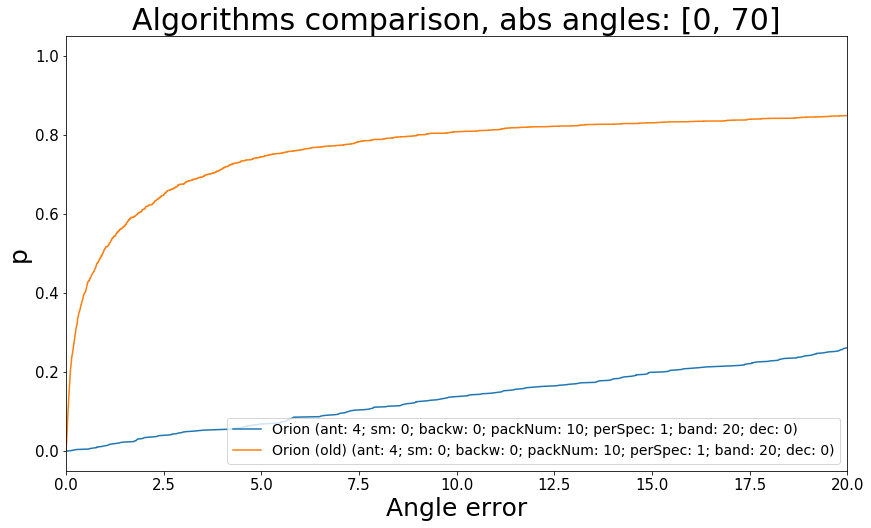

In [802]:
p1 = param(alg="orion", ant=4, sm=0, backw=0, packNum=10, seed_lim=1000)
p2 = param(alg="orion_old", ant=4, sm=0, backw=0, packNum=10, seed_lim=1000)

p = [p1,p2]

plotResults(p, [0, 70], "Algorithms comparison, abs angles: [0, 70]", 20, 0)

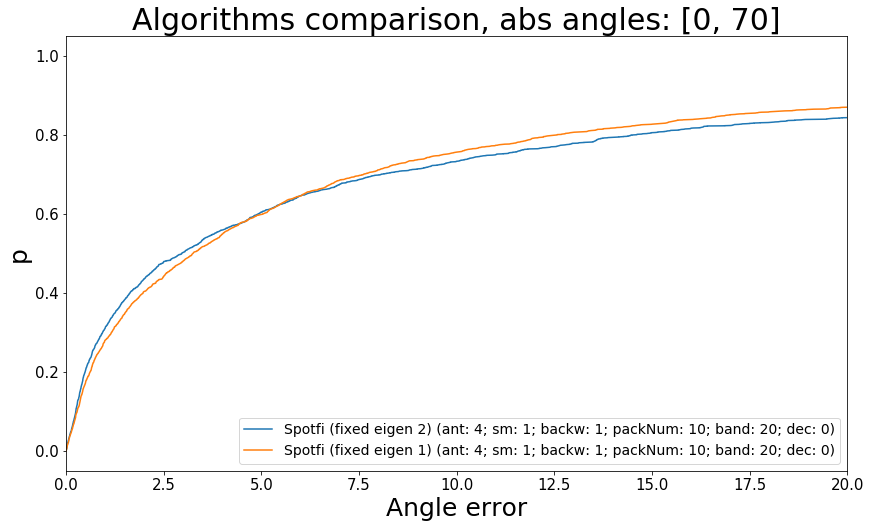

In [601]:
p1 = param(alg="spotfi_fixed", ant=4, sm=1, backw=1, packNum=10, seed_lim=3000)
p2 = param(alg="spotfi_fixed_1", ant=4, sm=1, backw=1, packNum=10, seed_lim=3000)

p = [p1,p2]

plotResults(p, [0, 70], "Algorithms comparison, abs angles: [0, 70]", 20, 0)

# Let's look at CDF of data

In [878]:
class param:
    def __init__(self, alg, backw, packNum, ant=4, sm=0, perSpec=1, band=20, dec=0, seed_lim=10000, 
                pr=False, xy=(0,0)):
        self.alg = alg
        self.ant = ant
        self.sm = sm
        self.backw = backw
        self.packNum = packNum
        self.perSpec = perSpec
        self.band = band
        self.dec = dec
        self.seed_lim = seed_lim
        self.pr = pr
        self.xy = xy

In [962]:
def bool2str(x):
    if x:
        return str(1)
    else:
        return str(0)

def plotResults(paramList, angleLimits, title, xlim, level, ant = 0, out=0, loc='lower right'):
    fig, axes = plt.subplots(figsize=(14,8))

    for param in paramList:
        if param.alg == "arraytrack":
            df = arr
            label = "Arraytrack"
            if param.backw:
                label += " + backward smoothing"
            label += ", packNum=" + str(param.packNum)
            param.sm = 1; param.band=20; param.dec=0; param.perSpec = 1;
        elif param.alg == "music":
            df = arr
            label = "Classical music"
            if param.backw:
                label = "Pillai’s algorithm"
            label += ", packNum=" + str(param.packNum)
            param.sm = 0; param.band=20; param.dec=0; param.perSpec = 1;
        elif param.alg == "orion_old":
            df = ori_old
            label = "Orion"
            if param.backw & param.sm:
                label += " + spatial and backward smoothing"
            elif param.backw:
                label += " + backward smoothing"
            elif param.sm:
                label += " + spatial smoothing"
                
            if param.perSpec > 1:
                label += " + multiple packets"
            
            label += ", packNum=" + str(param.packNum) + ", band=" + str(param.band) + \
                ", dec=" + bool2str(param.dec)
        elif param.alg == "spotfi_fixed":
            df = spotfi_fixed
            label = "Spotfi"
            param.perSpec = 1;
            if param.backw:
                label = "Chen’s algorithm"
            if not param.sm:
                label += ", without spatial smoothing"
            
            label += ", packNum=" + str(param.packNum) + ", band=" + str(param.band) + \
                ", dec=" + bool2str(param.dec)
        elif param.alg == "oparray_fixed":
            df = spotfi_fixed
            label = "OpArray"
            param.perSpec = 2;
            if param.backw:
                label += " + backward smoothing"
            if not param.sm:
                label += ", without spatial smoothing"
            
            label += ", packNum=" + str(param.packNum) + ", band=" + str(param.band) + \
                ", dec=" + bool2str(param.dec)
        elif param.alg == "orion":
            df = ori
            label = "Orion (new)"
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; perSpec: " + str(param.perSpec) + "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "spotfi":
            df = spotfi
            label = "Spotfi (eigen threshold)"
            param.perSpec = 1;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "oparray_fixed_min":
            df = spotfi_fixed
            label = "OpArray (fixed eigen + min error)"
            param.perSpec = 2;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "spotfi_fixed_1":
            df = spotfi_fixed_1
            label = "Spotfi (fixed eigen 1)"
            param.perSpec = 1;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "spotfi_fixed_min":
            df = spotfi_fixed
            label = "Spotfi (fixed eigen + min error)"
            param.perSpec = 1;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")"
        elif param.alg == "oparray":
            df = spotfi
            label = "OpArray (eigen threshold)"
            param.perSpec = 2;
            label += " (ant: " + str(param.ant) + "; sm: " + bool2str(param.sm) + \
                "; backw: " + bool2str(param.backw) + "; packNum: " + str(param.packNum) + \
                "; band: " + str(param.band) + \
                "; dec: " + bool2str(param.dec) + ")" 
            
        if ant == 0:
            a = param.ant
            label += ", ant=" + str(param.ant)
        else:
            a = ant
        
        df = df[(abs(df.realAngle) < angleLimits[1]) & (abs(df.realAngle) > angleLimits[0]) \
                & (df.ant == a) & (df.smoothing == param.sm) \
                & (df.backw == param.backw) & (df.packetNum == param.packNum) \
                & (df.perSpec == param.perSpec) & (df.bandwidth == param.band) \
                & (df.decimation == param.dec) & (df.seed < param.seed_lim)]

        if param.alg == "spotfi_fixed_min":
            sorted_df = np.sort(df.minErrorAngle)
        elif param.alg == "oparray_fixed_min":
            sorted_df = np.sort(df.minErrorAngle)
        else:
            sorted_df = np.sort(df.errorAngle)
            
        p = 1. * np.arange(len(sorted_df)) / (len(sorted_df) - 1)

        sub_p = abs(p-level)
        ind=np.where(sub_p == np.amin(sub_p))
        val = round(sorted_df[ind[0][0]]*100)/100
        if out:
            print(val)
        if param.pr == True:
            plt.annotate(str(val), xy=(val, level), xytext=param.xy,
                 arrowprops=dict(facecolor='black', shrink=0.01, width=1), size=15)
        
        plt.plot(sorted_df, p, label=label)

    if level > 0:
        plt.plot([level for i in range(100)], 'silver')
    
    if ant > 0:
        title += ", " + str(ant) + " antennas"
    
    plt.legend(loc=loc, fontsize=14)
    axes.set_title(title, fontdict={'fontsize':30})
    axes.set_xlabel('Angle error, degrees', size=25)
    axes.set_ylabel('p', size=25)
    axes.yaxis.set_tick_params(labelsize=15)
    axes.xaxis.set_tick_params(labelsize=15)
    axes.set_xlim([0, xlim])

# Arraytrack or Music?

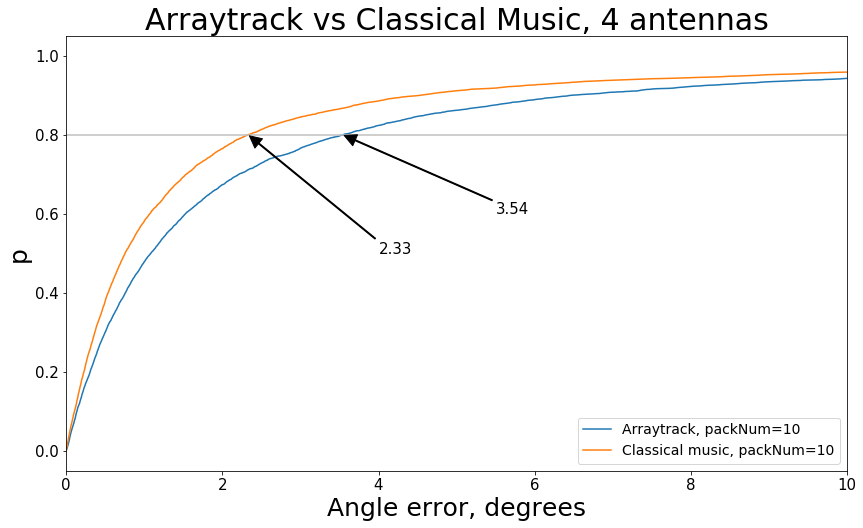

In [902]:
p1 = param(alg="arraytrack", backw=0, packNum=10, seed_lim=10000, pr=True, xy=(5.5,0.6))
p2 = param(alg="music", backw=0, packNum=10, seed_lim=10000, pr=True, xy=(4,0.5))

p = [p1,p2]

plotResults(p, [0, 70], "Arraytrack vs Classical Music", 10, 0.8, ant=4)

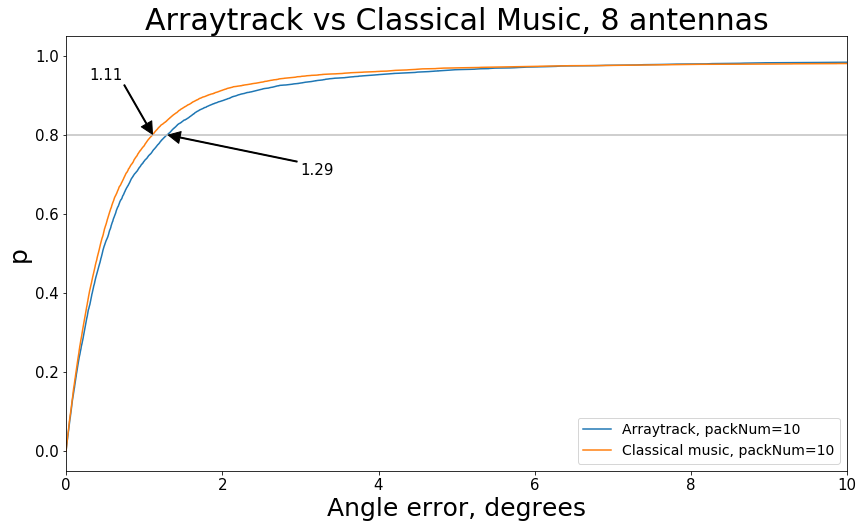

In [890]:
p1 = param(alg="arraytrack", backw=0, packNum=10, seed_lim=10000, pr=True, xy=(3,0.7))
p2 = param(alg="music", backw=0, packNum=10, seed_lim=10000, pr=True, xy=(0.3,0.94))

p = [p1,p2]

plotResults(p, [0, 70], "Arraytrack vs Classical Music", 10, 0.8, ant=8)

1) Classical music is better than Arraytrack. It is more noticeable in the case of 4 antennas.

2) Number of packets doesn't affect estimation accuracy in case of Arraytrack and Music.

# Packet number influence for Arraytrack and Music?

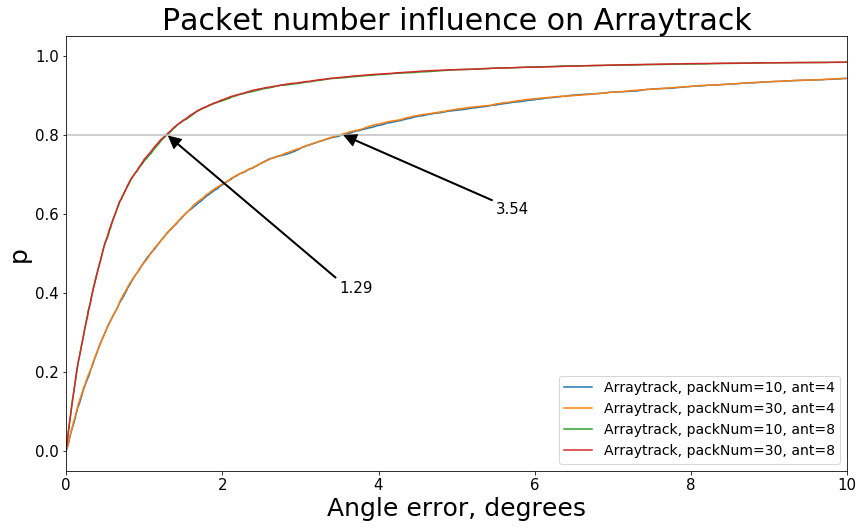

In [849]:
p1 = param(alg="arraytrack", ant=4, backw=0, packNum=10, seed_lim=10000, pr=True, xy=(5.5,0.6))
p2 = param(alg="arraytrack", ant=4, backw=0, packNum=30, seed_lim=10000)
p3 = param(alg="arraytrack", ant=8, backw=0, packNum=10, seed_lim=10000, pr=True, xy=(3.5,0.4))
p4 = param(alg="arraytrack", ant=8, backw=0, packNum=30, seed_lim=10000)

p = [p1,p2, p3,p4]

plotResults(p, [0, 70], "Packet number influence on Arraytrack", 10, 0.8)

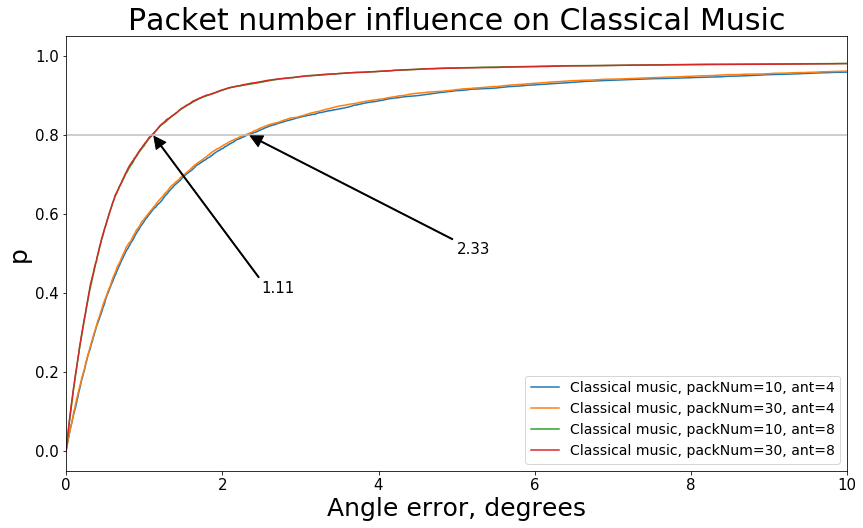

In [854]:
p1 = param(alg="music", ant=4, backw=0, packNum=10, seed_lim=10000, pr=True, xy=(5,0.5))
p2 = param(alg="music", ant=4, backw=0, packNum=30, seed_lim=10000)
p3 = param(alg="music", ant=8, backw=0, packNum=10, seed_lim=10000, pr=True, xy=(2.5,0.4))
p4 = param(alg="music", ant=8, backw=0, packNum=30, seed_lim=10000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Packet number influence on Classical Music", 10, 0.8)

1) Classical music is better than Arraytrack. It is more noticeable in the case of 4 antennas.

2) Number of packets doesn't affect estimation accuracy in case of Arraytrack and Music.

# What about backward smoothing for Arraytrack and Music?

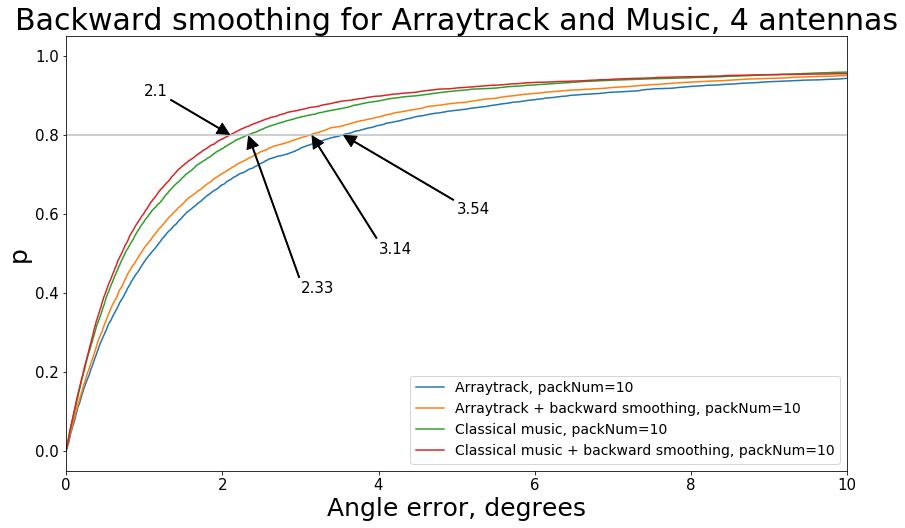

In [856]:
p1 = param(alg="arraytrack", backw=0, packNum=10, seed_lim=10000, pr=True, xy=(5,0.6))
p2 = param(alg="arraytrack", backw=1, packNum=10, seed_lim=10000, pr=True, xy=(4,0.5))
p3 = param(alg="music", backw=0, packNum=10, seed_lim=10000, pr=True, xy=(3,0.4))
p4 = param(alg="music", backw=1, packNum=10, seed_lim=10000, pr=True, xy=(1,0.9))

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Backward smoothing for Arraytrack and Music", 10, 0.8, ant=4)

1) Backward smoothing increases accuracy in case of 4 antennas.

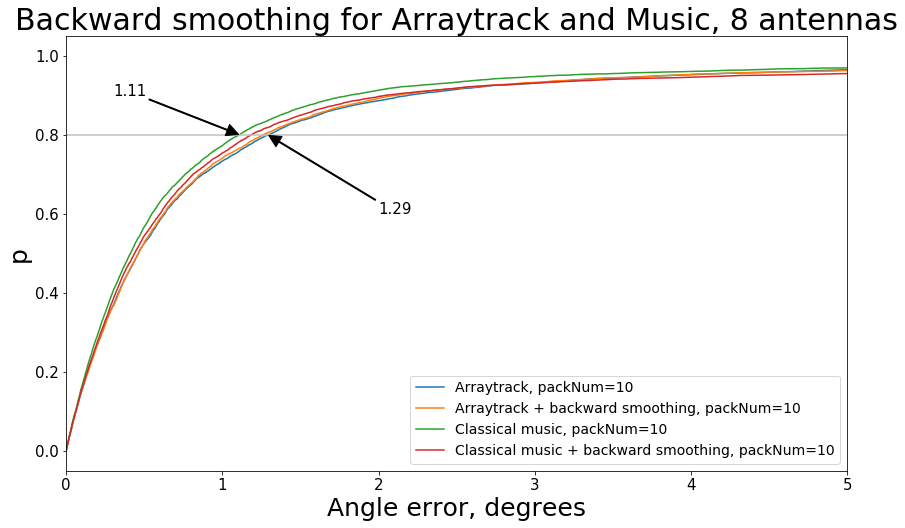

In [858]:
p1 = param(alg="arraytrack", backw=0, packNum=10, seed_lim=10000, pr=True, xy=(2,0.6))
p2 = param(alg="arraytrack", backw=1, packNum=10, seed_lim=10000)
p3 = param(alg="music", backw=0, packNum=10, seed_lim=10000, pr=True, xy=(0.3,0.9))
p4 = param(alg="music", backw=1, packNum=10, seed_lim=10000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Backward smoothing for Arraytrack and Music", 5, 0.8, ant=8)

1) However backward smoothing decreases accuracy in case of 8 antennas.

# Which configuration of Orion is the best?

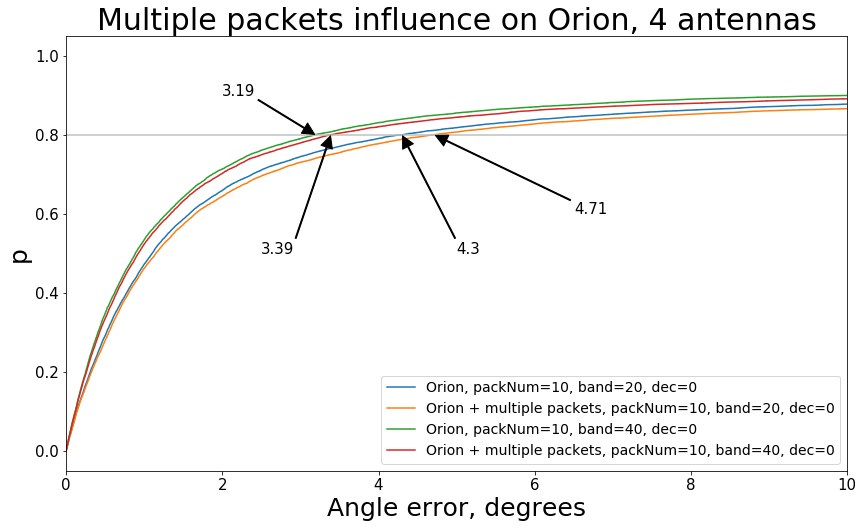

In [860]:
p1 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=10000, pr=True, xy=(5,0.5))
p2 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=0, seed_lim=10000, pr=True, xy=(6.5,0.6))
p3 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=10000, pr=True, xy=(2,0.9))
p4 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=0, seed_lim=10000, pr=True, xy=(2.5,0.5))

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Multiple packets influence on Orion", 10, 0.8, ant=4)

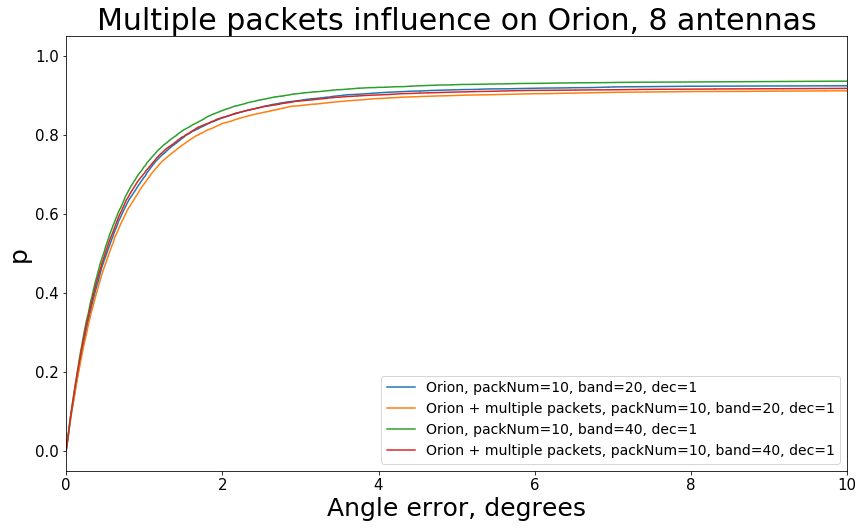

In [861]:
p1 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=10000)
p2 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=1, seed_lim=10000)
p3 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=10000)
p4 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=1, seed_lim=10000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Multiple packets influence on Orion", 10, 0, ant=8)

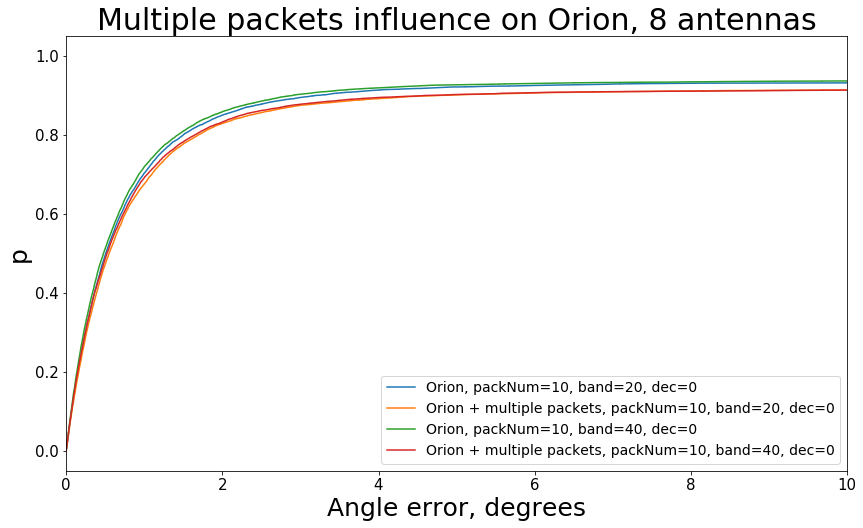

In [892]:
p1 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=10000)
p2 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=0, seed_lim=10000)
p3 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=10000)
p4 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=0, seed_lim=10000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Multiple packets influence on Orion", 10, 0, ant=8)

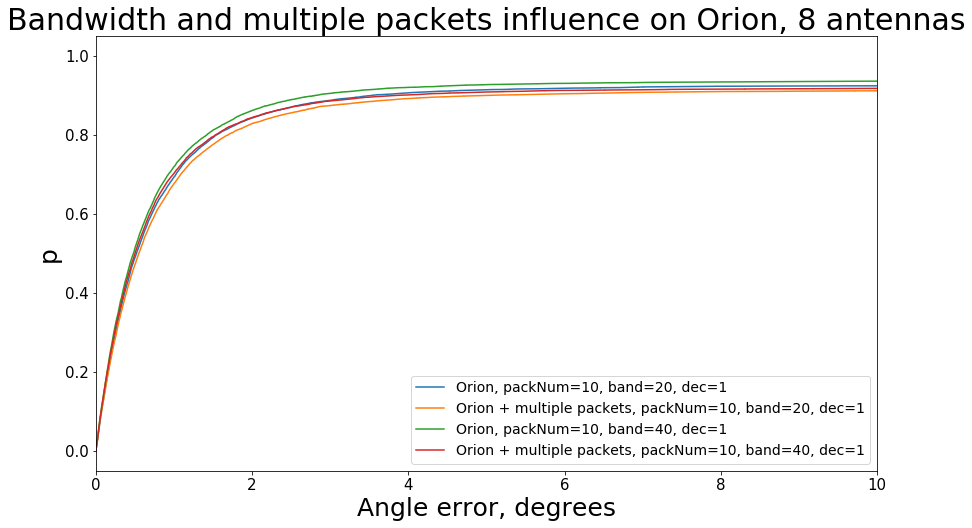

In [893]:
p1 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=10000)
p2 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=2, band=20, dec=1, seed_lim=10000)
p3 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=10000)
p4 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=2, band=40, dec=1, seed_lim=10000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Bandwidth and multiple packets influence on Orion", 10, 0, ant=8)

1) Multiple packets per spectrum decrease accuracy

2) Wider bandwidth increases accuracy

# What about subcarrier decimation in case of Orion?

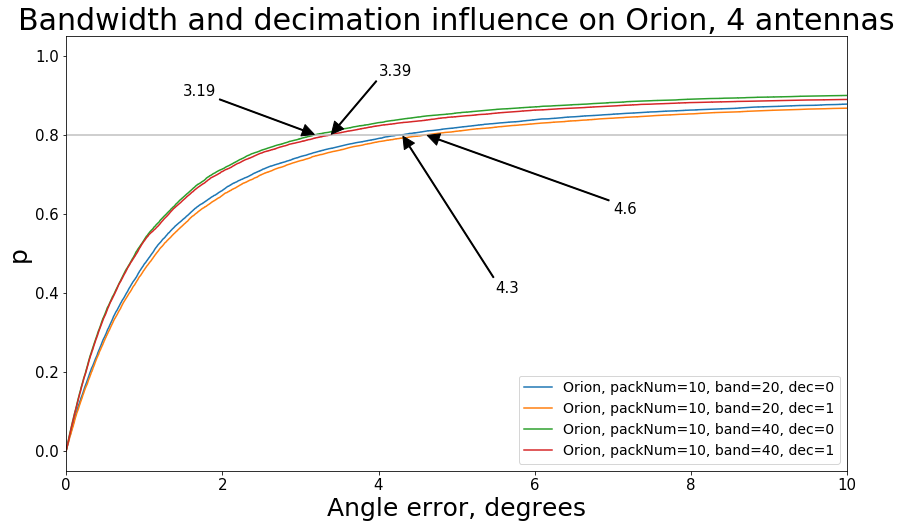

In [896]:
p1 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=10000, pr=True, xy=(5.5,0.4))
p2 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=10000, pr=True, xy=(7,0.6))
p3 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=10000, pr=True, xy=(1.5,0.9))
p4 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=10000, pr=True, xy=(4,0.95))

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Bandwidth and decimation influence on Orion", 10, 0.8, ant=4)

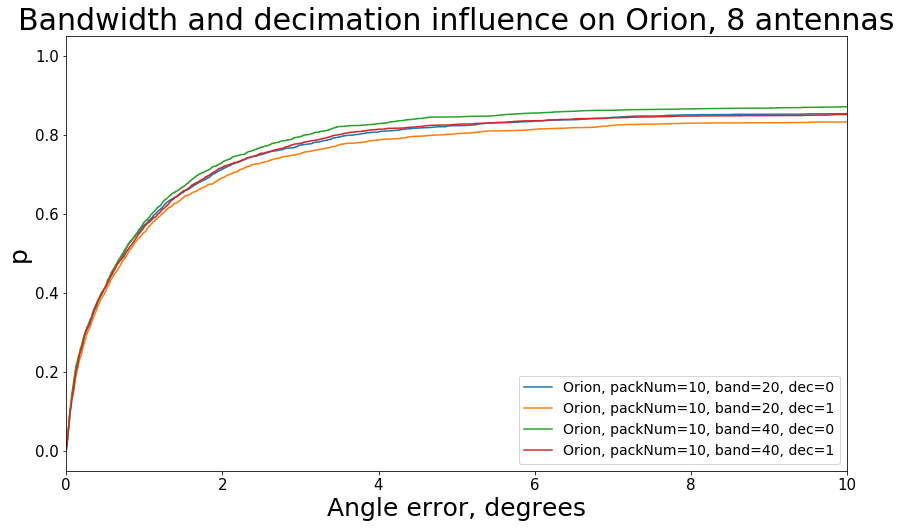

In [903]:
p1 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=2000)
p2 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=1, seed_lim=2000)
p3 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=0, seed_lim=2000)
p4 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=40, dec=1, seed_lim=2000)

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Bandwidth and decimation influence on Orion", 10, 0, ant=8)

1) More subcarriers - better accuracy.

# Which configuration of Spotfi is better?

8.93
7.53
7.93
7.46


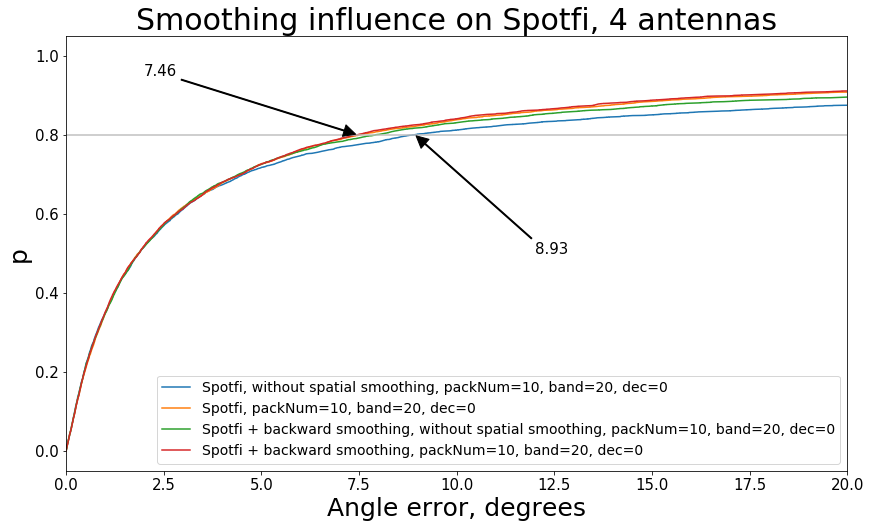

In [908]:
p1 = param(alg="spotfi_fixed", sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(12,0.5))
p2 = param(alg="spotfi_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000)
p3 = param(alg="spotfi_fixed", sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=10000)
p4 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(2,0.95))

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Smoothing influence on Spotfi", 20, 0.8, ant=4, out=1)

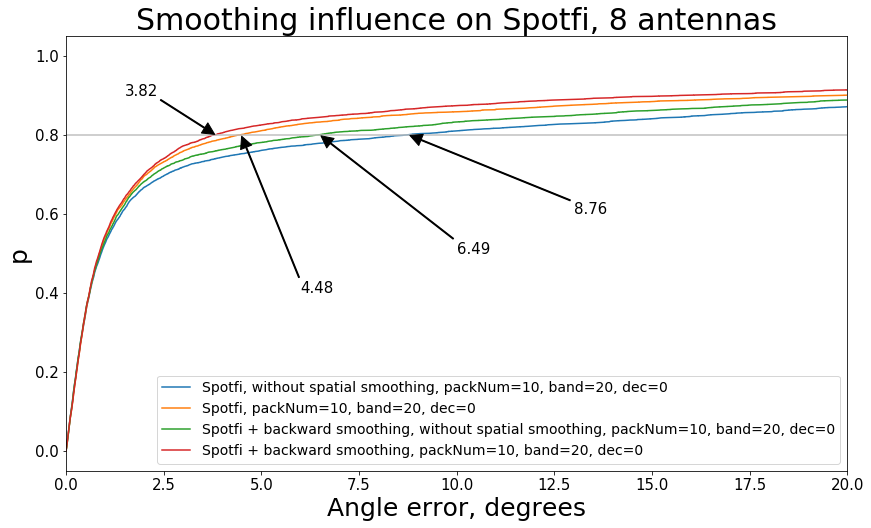

In [906]:
p1 = param(alg="spotfi_fixed", sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(13,0.6))
p2 = param(alg="spotfi_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(6,0.4))
p3 = param(alg="spotfi_fixed", sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(10,0.5))
p4 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(1.5,0.9))

p = [p1,p2,p3,p4]

plotResults(p, [0, 70], "Smoothing influence on Spotfi", 20, 0.8, ant=8)

1) Smoothing INCREASES accuracy when eigen values amount is FIXED.

2) Backward smoothing INCREASES accuracy when eigen values amount is FIXED.

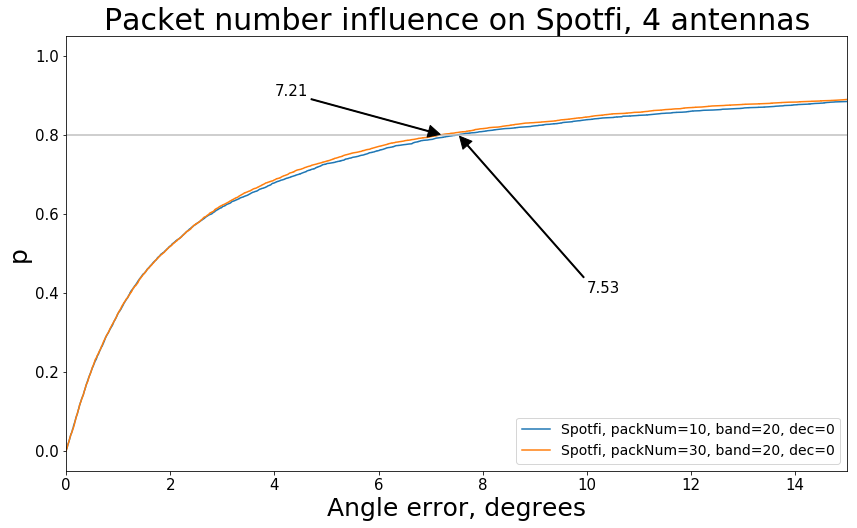

In [909]:
p1 = param(alg="spotfi_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(10,0.4))
p2 = param(alg="spotfi_fixed", sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=10000, pr=True, xy=(4,0.9))

p = [p1,p2]

plotResults(p, [0, 70], "Packet number influence on Spotfi", 15, 0.8, ant=4)

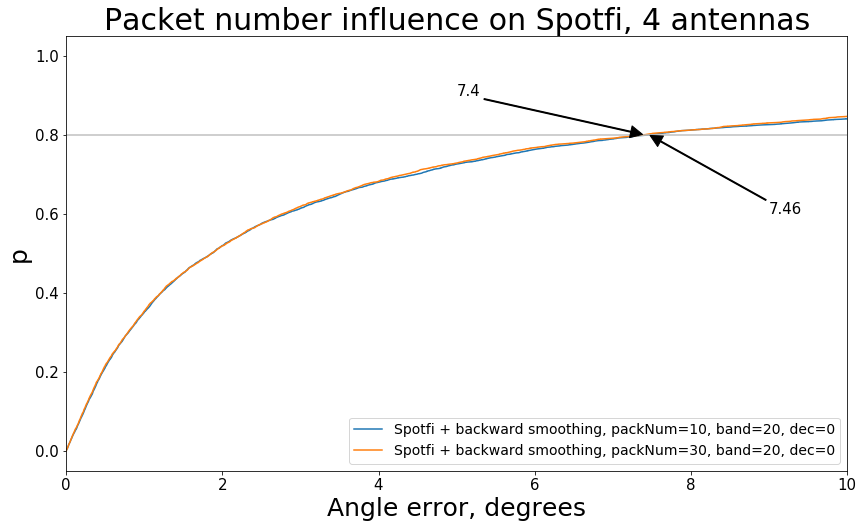

In [910]:
p1 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(9,0.6))
p2 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=10000, pr=True, xy=(5,0.9))

p = [p1,p2]

plotResults(p, [0, 70], "Packet number influence on Spotfi", 10, 0.8, ant=4)

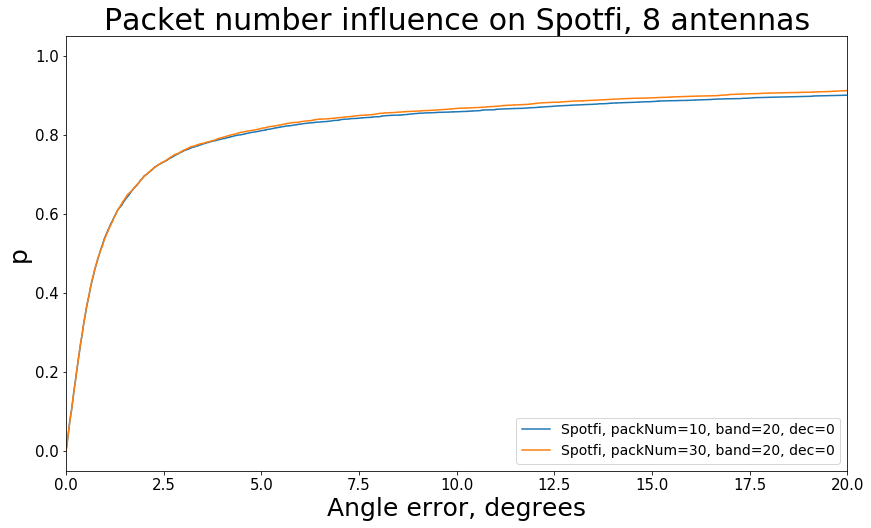

In [911]:
p1 = param(alg="spotfi_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000)
p2 = param(alg="spotfi_fixed", sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=10000)

p = [p1,p2]

plotResults(p, [0, 70], "Packet number influence on Spotfi", 20, 0, ant=8)

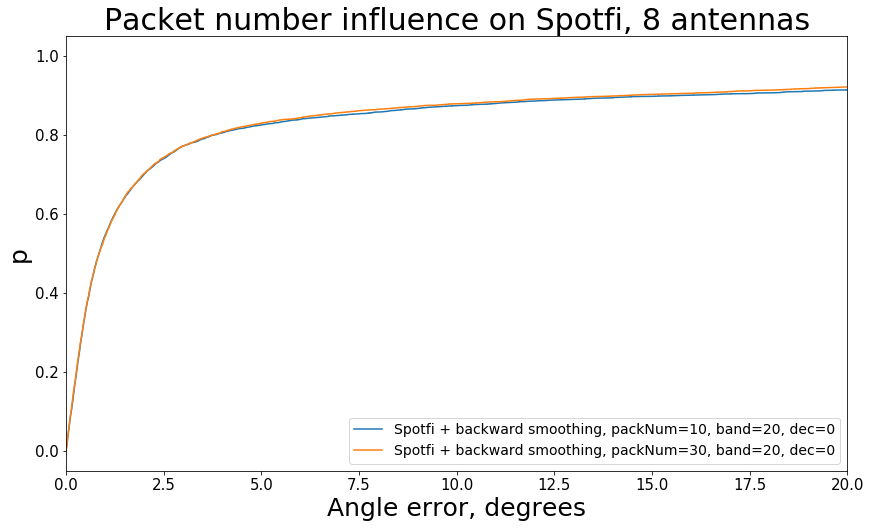

In [912]:
p1 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000)
p2 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=10000)

p = [p1,p2]

plotResults(p, [0, 70], "Packet number influence on Spotfi", 20, 0, ant=8)

1) Number of packets almost doesn't affect estimation accuracy in case of 4 antennas.

2) Increase of packet number slightly increases estimation accuracy in case of 8 antennas.

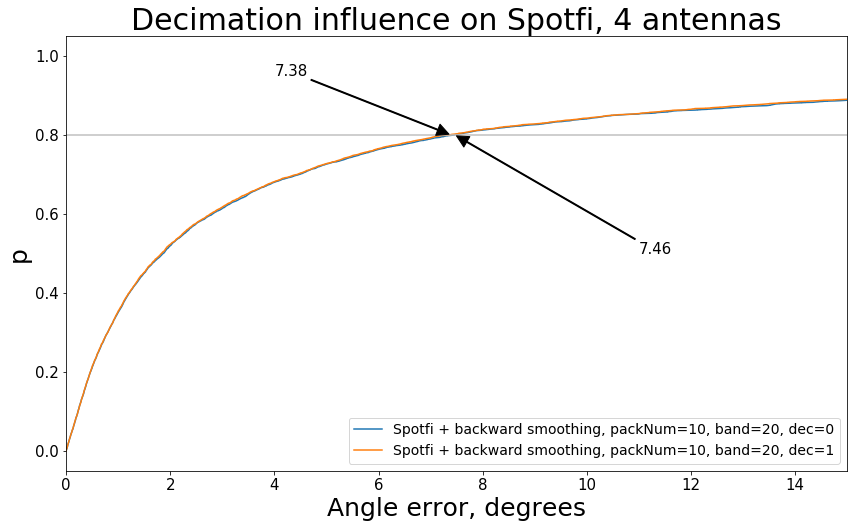

In [914]:
p1 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(11,0.5))
p2 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=10000, pr=True, xy=(4,0.95))

p = [p1,p2]

plotResults(p, [0, 70], "Decimation influence on Spotfi", 15, 0.8, ant=4)

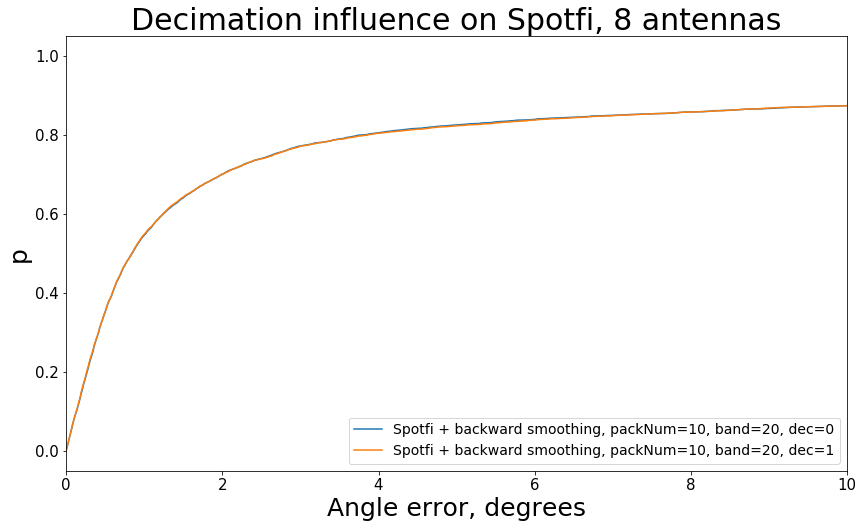

In [919]:
p1 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000)
p2 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=10000)

p = [p1,p2]

plotResults(p, [0, 70], "Decimation influence on Spotfi", 10, 0, ant=8)

1) Decimation almost doesn't affect estimation accuracy in case of 4 antennas.

2) Decimation slightly decreases estimation accuracy in case of 8 antennas.

# Which configuration of OpArray is better?

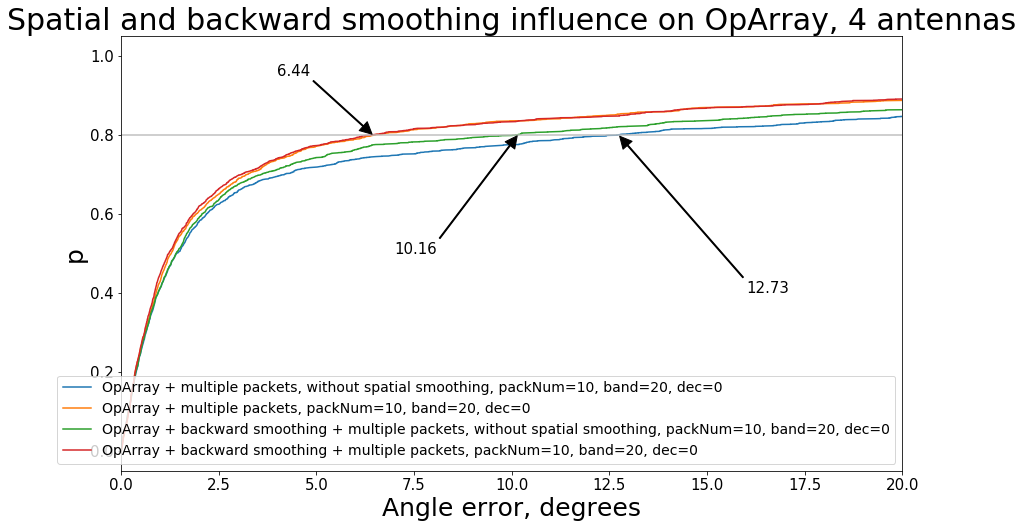

In [920]:
p1 = param(alg="oparray_fixed", sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(16,0.4))
p2 = param(alg="oparray_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000)
p3 = param(alg="oparray_fixed", sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(7,0.5))
p4 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(4,0.95))

p = [p1,p2,p3,p4]

plotResults(p, [0, 20], "Smoothing influence on OpArray", 20, 0.8, ant=4)

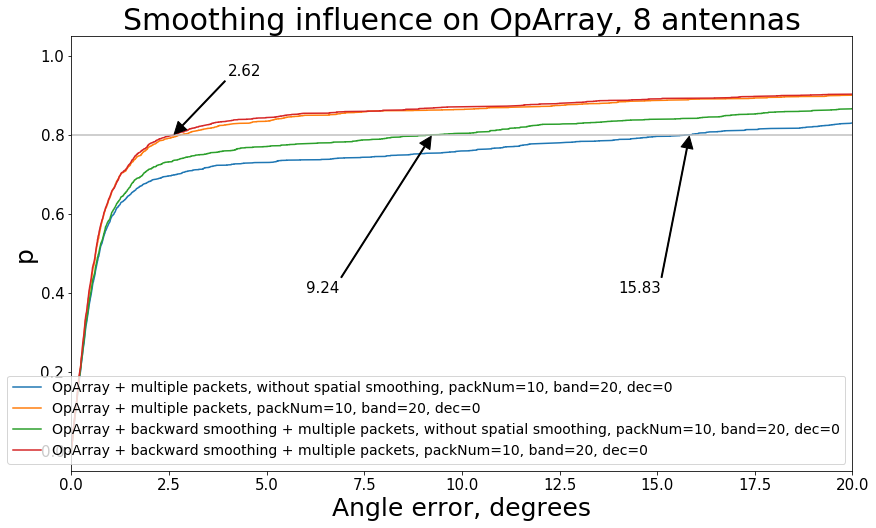

In [921]:
p1 = param(alg="oparray_fixed", sm=0, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(14,0.4))
p2 = param(alg="oparray_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000)
p3 = param(alg="oparray_fixed", sm=0, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(6,0.4))
p4 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(4,0.95))

p = [p1,p2,p3,p4]

plotResults(p, [0, 20], "Smoothing influence on OpArray", 20, 0.8, ant=8)

1) Smoothing INCREASES accuracy when eigen values amount is FIXED.

2) Backward smoothing significantly INCREASES accuracy when eigen values amount is FIXED.

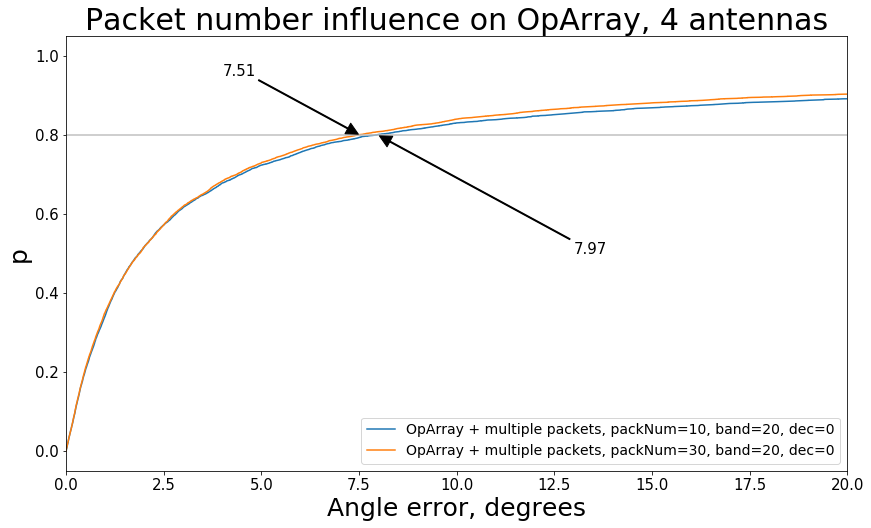

In [922]:
p1 = param(alg="oparray_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(13,0.5))
p2 = param(alg="oparray_fixed", sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=10000, pr=True, xy=(4,0.95))

p = [p1,p2]

plotResults(p, [0, 70], "Packet number influence on OpArray", 20, 0.8, ant=4)

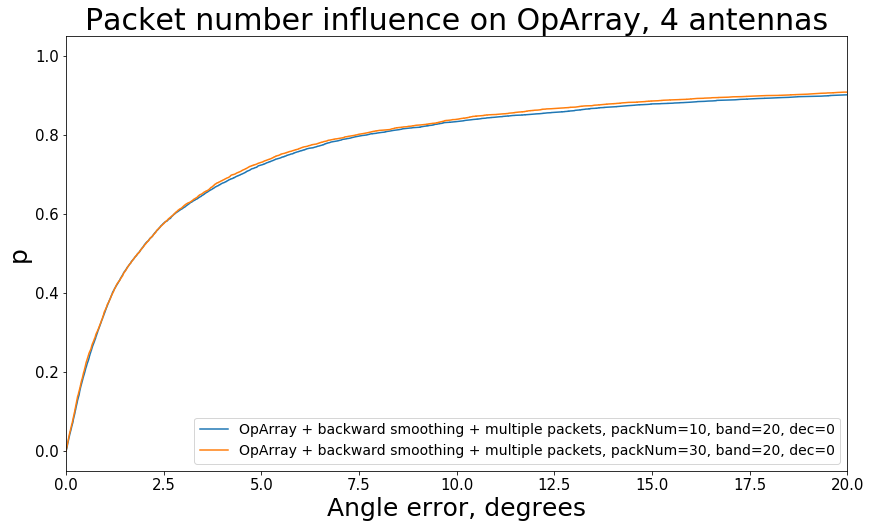

In [923]:
p1 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000)
p2 = param(alg="oparray_fixed", sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=10000)

p = [p1,p2]

plotResults(p, [0, 70], "Packet number influence on OpArray", 20, 0, ant=4)

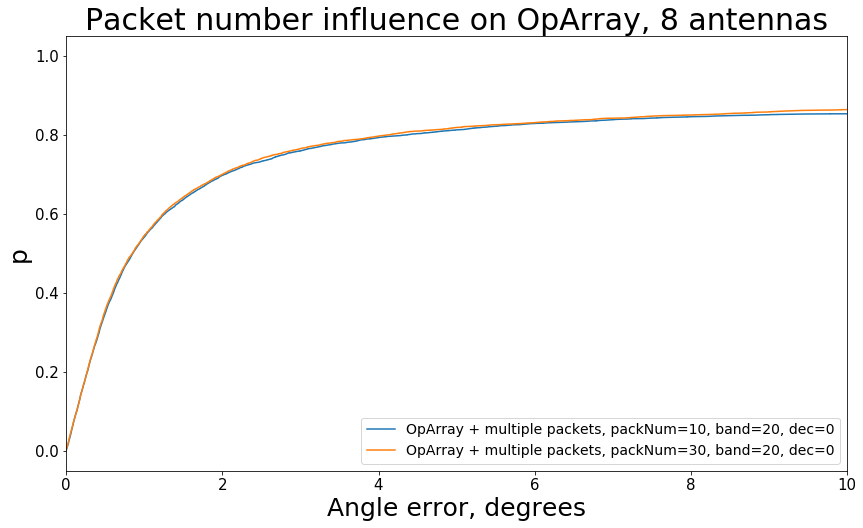

In [924]:
p1 = param(alg="oparray_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000)
p2 = param(alg="oparray_fixed", sm=1, backw=0, packNum=30, band=20, dec=0, seed_lim=10000)

p = [p1,p2]

plotResults(p, [0, 70], "Packet number influence on OpArray", 10, 0, ant=8)

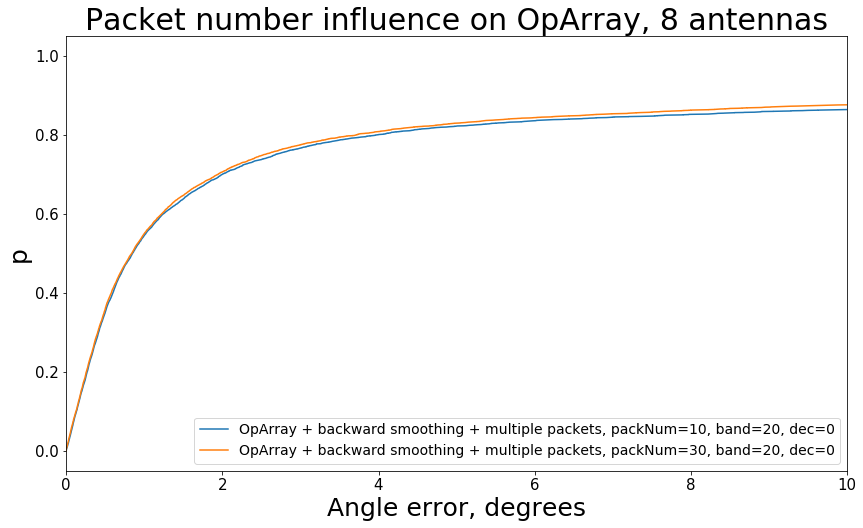

In [925]:
p1 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000)
p2 = param(alg="oparray_fixed", sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=10000)

p = [p1,p2]

plotResults(p, [0, 70], "Packet number influence on OpArray", 10, 0, ant=8)

1) Increase of packet number increases estimation accuracy of Orion in all cases.

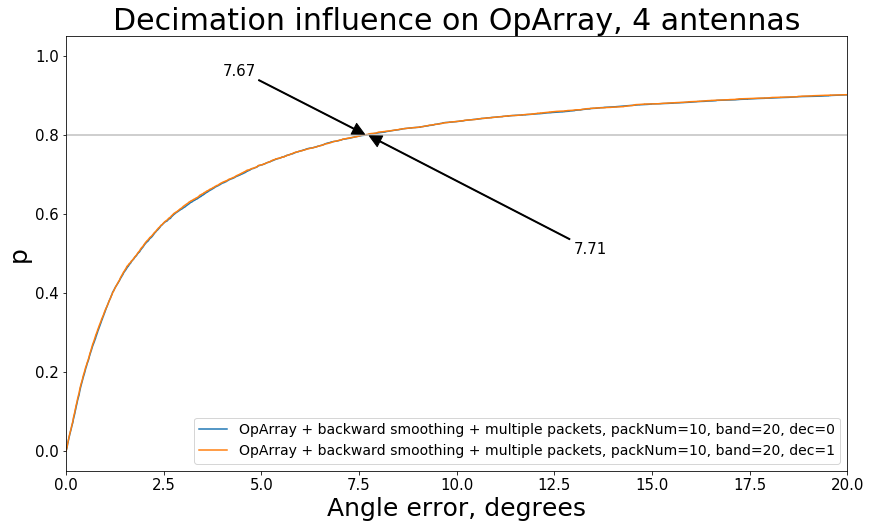

In [926]:
p1 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(13,0.5))
p2 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=10000, pr=True, xy=(4,0.95))

p = [p1,p2]

plotResults(p, [0, 70], "Decimation influence on OpArray", 20, 0.8, ant=4)

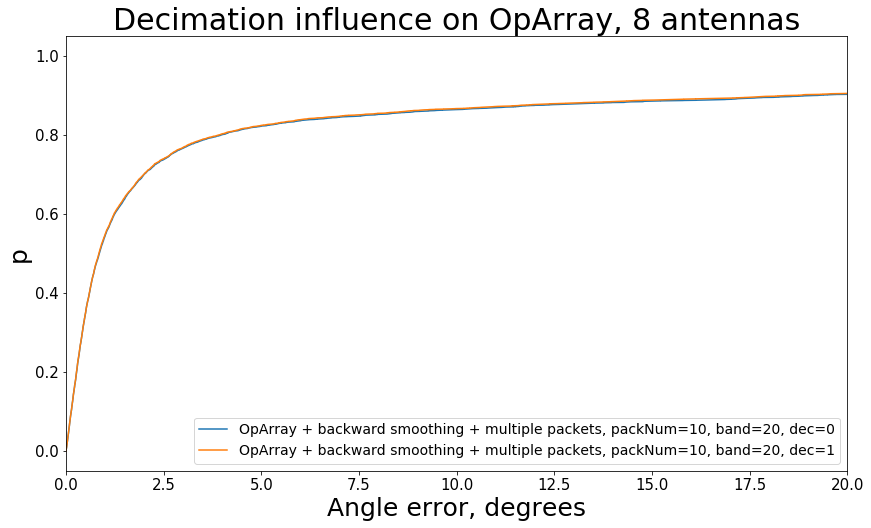

In [927]:
p1 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000)
p2 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=1, seed_lim=10000)

p = [p1,p2]

plotResults(p, [0, 70], "Decimation influence on OpArray", 20, 0, ant=8)

1) Decimation almost doesn't affect estimation accuracy in case of 4 antennas.

2) Decimation even slightly increases estimation accuracy in case of 8 antennas.

# Spotfi or OpArray?

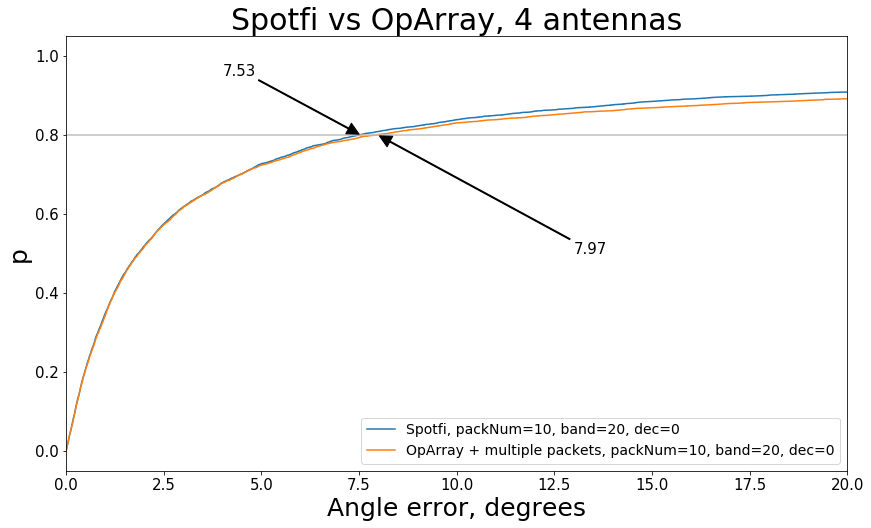

In [928]:
p1 = param(alg="spotfi_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(4,0.95))
p2 = param(alg="oparray_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(13,0.5))

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi vs OpArray", 20, 0.8, ant=4)

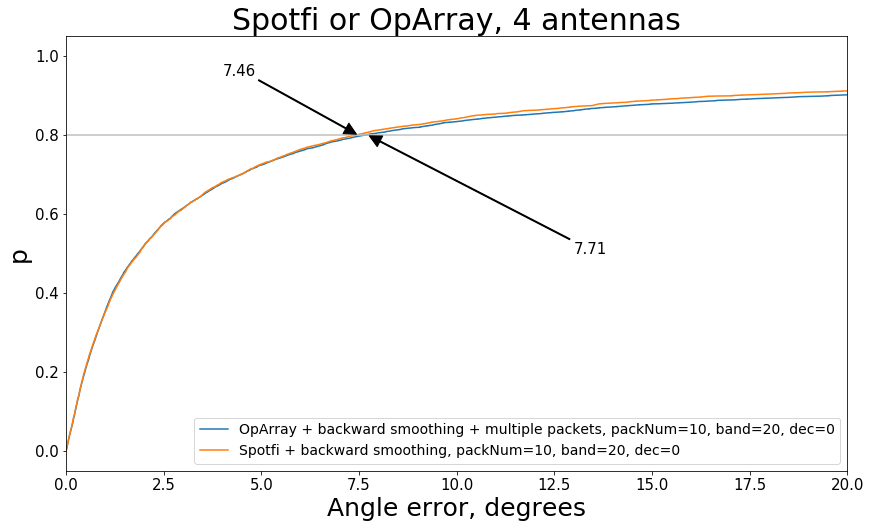

In [929]:
p1 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(13,0.5))
p2 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(4,0.95))

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi or OpArray", 20, 0.8, ant=4)

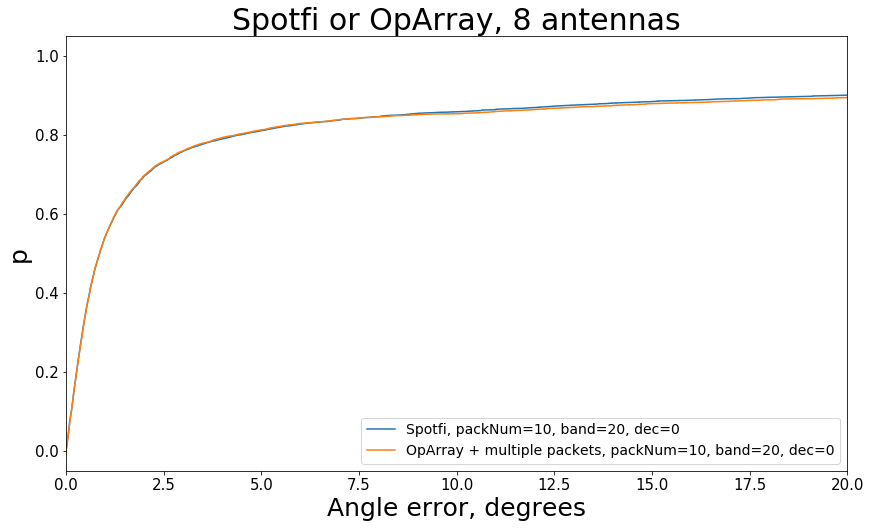

In [930]:
p1 = param(alg="spotfi_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000)
p2 = param(alg="oparray_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi or OpArray", 20, 0, ant=8)

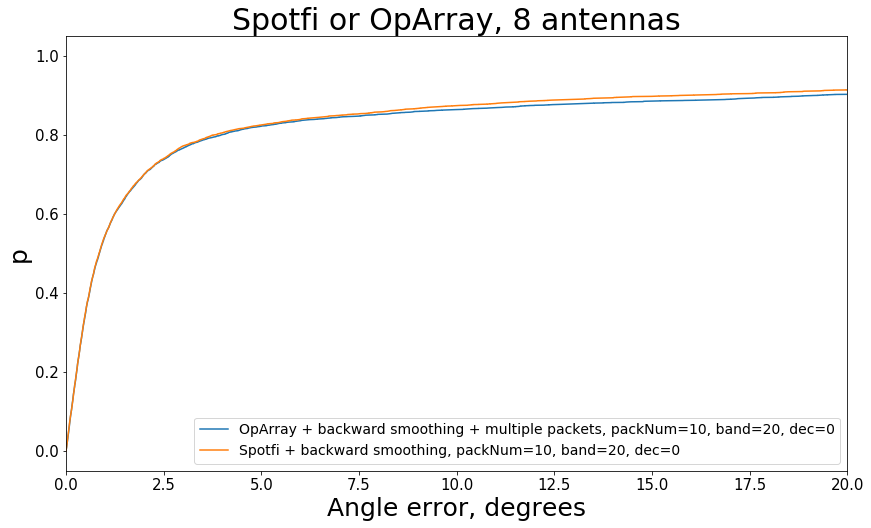

In [931]:
p1 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000)
p2 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000)

p = [p1,p2]

plotResults(p, [0, 70], "Spotfi or OpArray", 20, 0, ant=8)

1) In general Spotfi works better than OpArray.

# Best algorithms comparison in different angle range

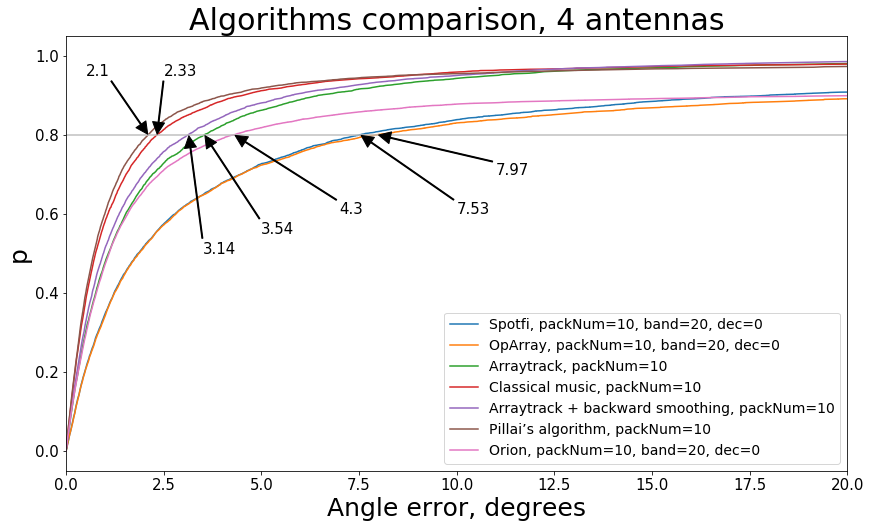

In [963]:
p1 = param(alg="spotfi_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(10,0.6))
p2 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000)
p3 = param(alg="oparray_fixed", sm=1, backw=0, packNum=10, band=20, dec=0, seed_lim=10000, pr=True, xy=(11,0.7))
p4 = param(alg="oparray_fixed", sm=1, backw=1, packNum=10, band=20, dec=0, seed_lim=10000)
p5 = param(alg="arraytrack", backw=0, packNum=10, seed_lim=10000, pr=True, xy=(5,0.55))
p6 = param(alg="music", backw=0, packNum=10, seed_lim=10000, pr=True, xy=(2.5,0.95))
p7 = param(alg="arraytrack", backw=1, packNum=10, seed_lim=10000, pr=True, xy=(3.5,0.5))
p8 = param(alg="music", backw=1, packNum=10, seed_lim=10000, pr=True, xy=(0.5,0.95))
p9 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=10000, pr=True, xy=(7,0.6))

p = [p1,p3,p5,p6,p7,p8,p9]

plotResults(p, [0, 70], "Algorithms comparison", 20, 0.8, ant=4)

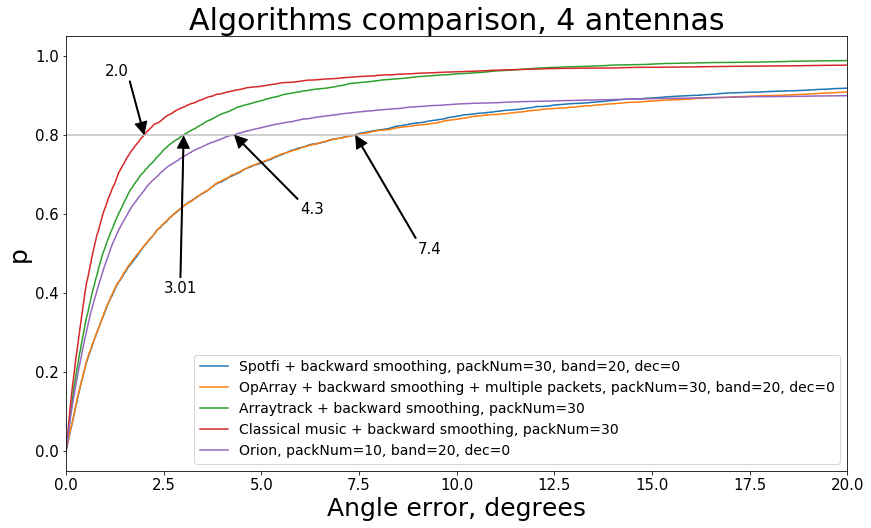

In [932]:
p1 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=10000, pr=True, xy=(9,0.5))
p2 = param(alg="oparray_fixed", sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=10000)
p3 = param(alg="arraytrack", backw=1, packNum=30, seed_lim=10000, pr=True, xy=(2.5,0.4))
p4 = param(alg="music", backw=1, packNum=30, seed_lim=10000, pr=True, xy=(1,0.95))
p5 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=10000, pr=True, xy=(6,0.6))

p = [p1,p2,p3,p4,p5]

plotResults(p, [0, 70], "Algorithms comparison", 20, 0.8, ant=4)

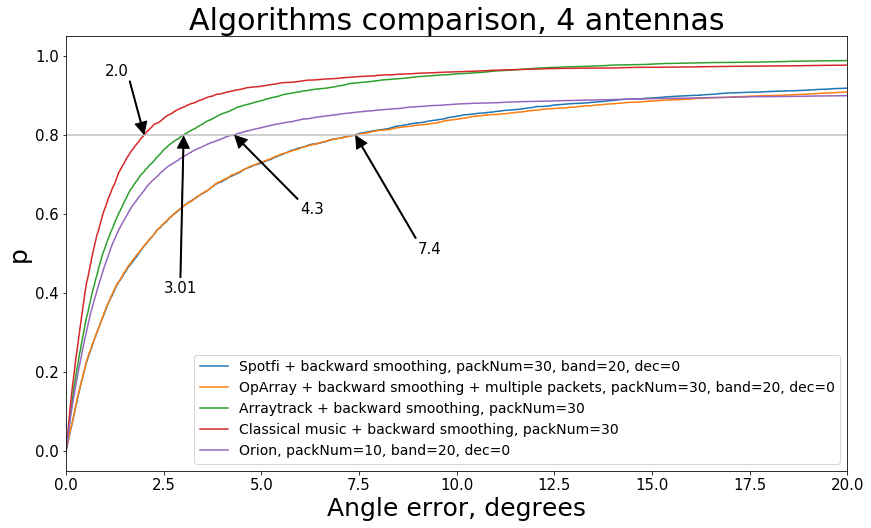

In [938]:
p1 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=10000, pr=True, xy=(9,0.5))
p2 = param(alg="oparray_fixed", sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=10000)
p3 = param(alg="arraytrack", backw=1, packNum=30, seed_lim=10000, pr=True, xy=(2.5,0.4))
p4 = param(alg="music", backw=1, packNum=30, seed_lim=10000, pr=True, xy=(1,0.95))
p5 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=10000, pr=True, xy=(6,0.6))

p = [p1,p2,p3,p4,p5]

plotResults(p, [0, 70], "Algorithms comparison", 20, 0.8, ant=4)

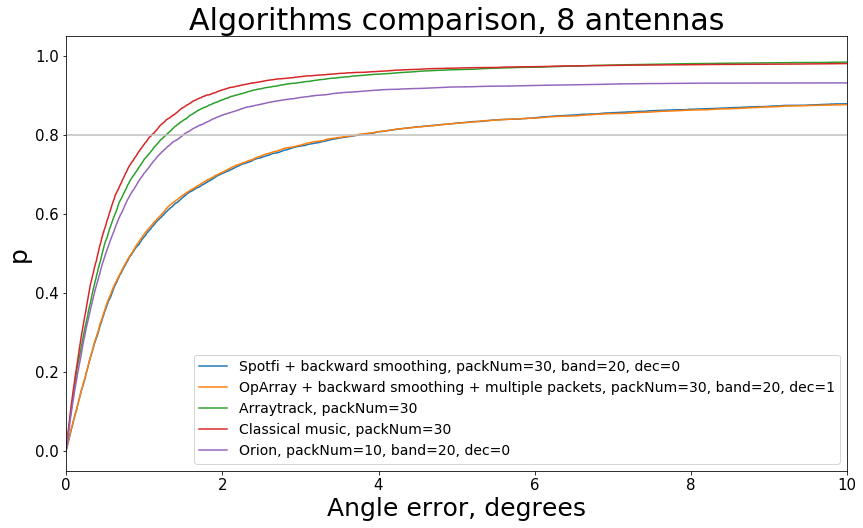

In [937]:
p1 = param(alg="spotfi_fixed", sm=1, backw=1, packNum=30, band=20, dec=0, seed_lim=10000)
p2 = param(alg="oparray_fixed", sm=1, backw=1, packNum=30, band=20, dec=1, seed_lim=10000)
p3 = param(alg="arraytrack", backw=0, packNum=30, seed_lim=10000)
p4 = param(alg="music", backw=0, packNum=30, seed_lim=10000)
p5 = param(alg="orion_old", sm=0, backw=0, packNum=10, perSpec=1, band=20, dec=0, seed_lim=10000)

p = [p1,p2,p3,p4,p5]

plotResults(p, [0, 70], "Algorithms comparison", 10, 0.8, ant=8)